In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [61]:
df=pd.read_csv('Fraud (1).csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [62]:
# Cleaning the data

In [63]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [64]:
df['amount'].unique()

array([9.83964000e+03, 1.86428000e+03, 1.81000000e+02, ...,
       3.39682130e+05, 6.31140928e+06, 8.50002520e+05])

In [65]:
df['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [66]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [67]:
df['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

In [68]:
df['oldbalanceDest'].unique()

array([      0.  ,   21182.  ,   41898.  , ...,  503464.5 ,   68488.84,
       6510099.11])

In [69]:
df['newbalanceDest'].unique()

array([      0.  ,   40348.79,  157982.12, ..., 1762283.33, 6379898.11,
       7360101.63])

In [70]:
df.describe() #If the DataFrame contains numerical data, 
              #the description contains these information for each column: count
              #The number of not-empty values. mean - 
              #The average (mean) value. std - The standard deviation.

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [71]:
df.info() #info syntax calculate the dtype in the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [72]:
df.isna().sum() #Check the data is clear or not 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# After cleaning the data set, getting final data set, check for the missing values in data set. no missing values.

# Checking The Outliers

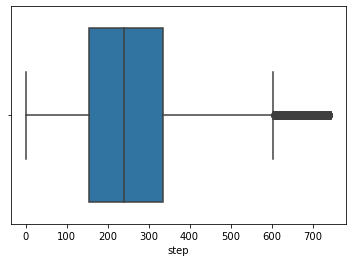

In [86]:
sns.boxplot(x=df['step'])
plt.show()

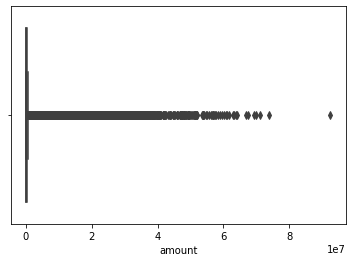

In [84]:
sns.boxplot(x=df['amount'])
plt.show()

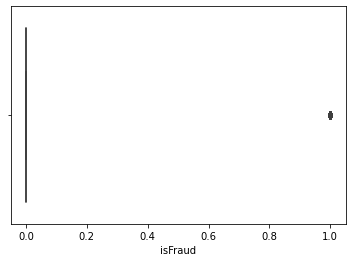

In [87]:
sns.boxplot(x=df['isFraud'])
plt.show()

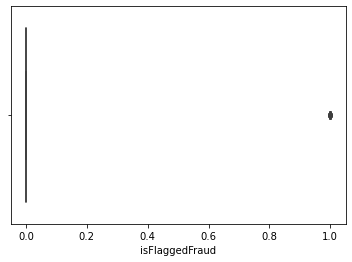

In [89]:
sns.boxplot(x=df['isFlaggedFraud'])
plt.show()

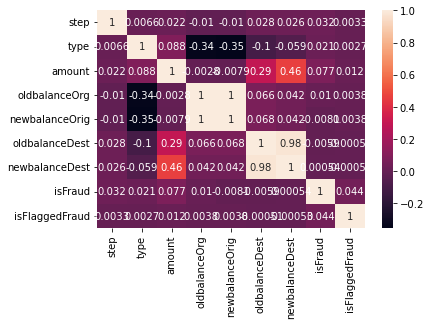

In [90]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [73]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [74]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [75]:
df=df.drop(['nameOrig','nameDest'],axis=1) #Data Pre-processing

In [76]:
# Import label Encoder
from sklearn import preprocessing

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing .LabelEncoder()

df['type']= label_encoder.fit_transform(df['type'])

In [77]:
X, y = df.loc[:, df.columns !='isFraud'], df['isFraud']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=42)  #train test phase

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
# Import Gaussian Navie Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)


#Predict the response for the test dataset
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9955882953877491


In [81]:
from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print ("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9992070876462841


Explanation of the Code
1. Initially, we have loaded all the necessary libraries through which our dataset is loaded, and accordingly, we will make the further model. Secondly, we have checked that if the dataset contains any null values, we need to clean our dataset and then move with further operations.

2. As the dataset does not contain any null values, so we can move ahead with further operations and can select the algorithm to train our dataset.

3. In this code, we have used Naïve Bayes, and Gaussian Classifiers along with logistic regression is used to train our model, and accordingly, we will test it.

4. Through the sklearn module of python, we are importing the pre-processing module so that we can make our raw data suitable for further analysis.

Conclusion

Hence we have successfully built the predicting fraud transactions using machine learning model that predicts the transactions to be fraud or not fraud according to the given features and the given data. 
 